In [1]:
%pip install -q numpy matplotlib torch imageio

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
import shutil
import imageio.v2 as imageio
from IPython.display import Image

In [4]:
def draw_graph(w, x_vals, y_vals):
    plt.scatter(x_vals, y_vals, s=10, color="g", label="Data")
    x_line = [0, 5]
    y_line = [0, 15]
    plt.plot(x_line, y_line, "b--", label="y=3x")
    y_model_line = [w * x for x in x_line]
    plt.plot(x_line, y_model_line, "r", label=f"y={w:.2f}x")

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Linear Regression")
    plt.legend()

    plt.show()

def save_graph(w, epoch, x_vals, y_vals):
    plt.scatter(x_vals, y_vals, s=10, color="g", label="Data")
    x_line = [0, 5]
    y_line = [0, 15]
    plt.plot(x_line, y_line, "b--", label="y=3x")
    y_model_line = [w * x for x in x_line]
    plt.plot(x_line, y_model_line, "r", label=f"y={w:.2f}x")

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Linear Regression")
    plt.legend()

    plt.savefig(f"results/{epoch}.png")
    plt.close()

def draw_loss(w, x, y, lossfn):
    plt.plot(x, y, linestyle="--", label="Loss Function")
    plt.xlabel("w")
    plt.ylabel("Loss")

    plt.title("Loss")
    plt.scatter([w], [lossfn(w)], color="r", label=f"Current w: {w}")
    plt.legend()

    plt.show()

def save_loss(w, x, y, lossfn, epoch):
    plt.plot(x, y, linestyle="--", label="Loss Function")
    plt.xlabel("w")
    plt.ylabel("Loss")

    plt.title("Loss")
    plt.scatter([w], [lossfn(w)], color="r", label=f"Current w: {w}")
    plt.legend()

    plt.savefig(f"Losses/{epoch}.png")
    plt.close()

In [3]:
if os.path.exists("results"):
    shutil.rmtree("results")
os.makedirs("results", exist_ok=True)
if os.path.exists("Losses"):
    shutil.rmtree("Losses")
os.makedirs("Losses", exist_ok=True)

In [5]:
datas = []
for i in range(200):
    x = random.uniform(0, 5)
    e = 2 * (random.random() - 0.5)
    y = 3 * x + e
    datas.append((x, y))

x_vals, y_vals = zip(*datas)

In [6]:
a = sum(x**2 for x in x_vals)
b = sum(-2 * x * y for x, y in datas)
c = sum(y**2 for y in y_vals)

def lossfn(w):
    return a * w**2 + b * w + c

x = np.linspace(-3, 9, 200)
y = lossfn(x)

In [7]:
model = torch.nn.Linear(1, 1, bias=False)

x_tensor = torch.tensor(x_vals, dtype=torch.float32).unsqueeze(1)
y_tensor = torch.tensor(y_vals, dtype=torch.float32).unsqueeze(1)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

w = model.weight.item()
print(f"Initial w: {w}")

Initial w: -0.9608443975448608


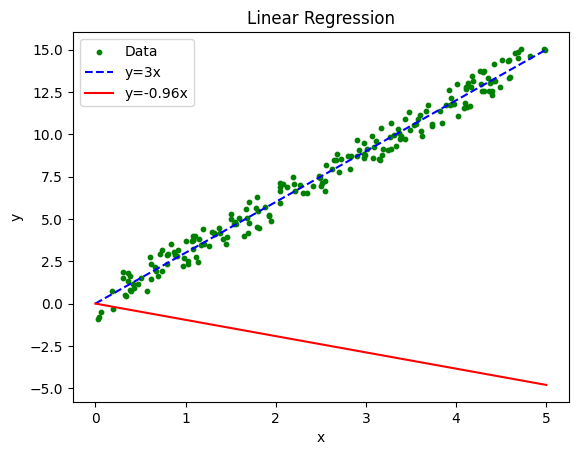

In [8]:
draw_graph(w, x_vals, y_vals)

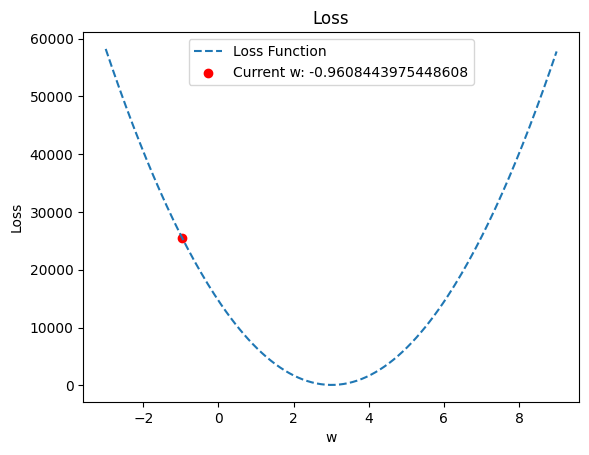

In [9]:
draw_loss(w, x, y, lossfn)

In [10]:
print(f'Initial w = {model.weight.item():.4f}')
print(f"y = {model.weight.item():.4f}x")

Initial w = -0.9608
y = -0.9608x


In [11]:
for epoch in range(300):
    save_graph(model.weight.item(), epoch, x_vals, y_vals)
    save_loss(model.weight.item(), x, y, lossfn, epoch)
    if epoch % 30 == 0:
        print(f'Epoch {epoch}, w = {model.weight.item():.4f}')
    optimizer.zero_grad()
    outputs = model(x_tensor)
    loss = criterion(outputs, y_tensor)
    loss.backward()
    optimizer.step()

Epoch 0, w = -0.9608
Epoch 30, w = 0.5696
Epoch 60, w = 1.5104
Epoch 90, w = 2.0887
Epoch 120, w = 2.4442
Epoch 150, w = 2.6627
Epoch 180, w = 2.7970
Epoch 210, w = 2.8796
Epoch 240, w = 2.9303
Epoch 270, w = 2.9615


In [12]:
w = model.weight.item()
print(f"w: {w}")

w: 2.980725049972534


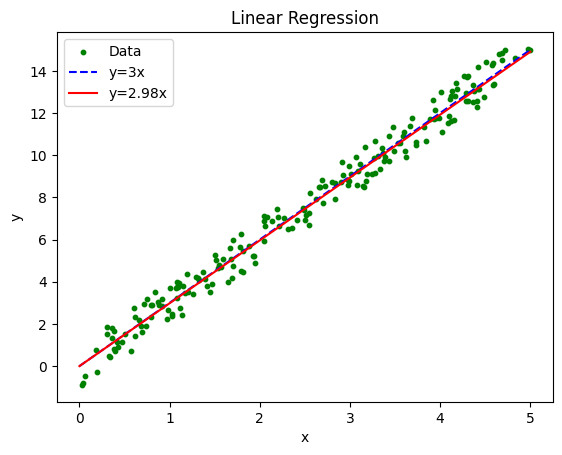

In [13]:
draw_graph(w, x_vals, y_vals)

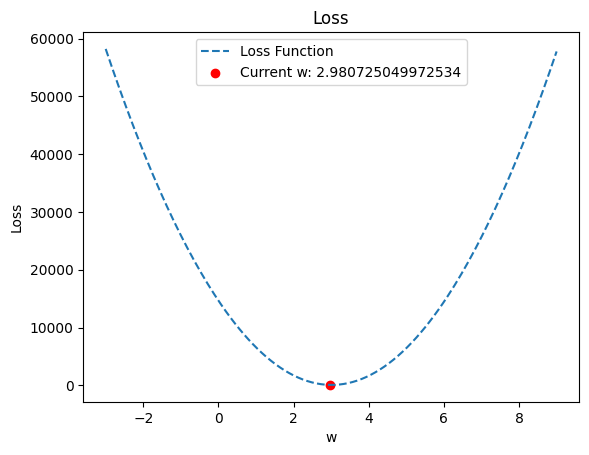

In [14]:
draw_loss(w, x, y, lossfn)

In [15]:
frames = []

for i in range(1, 501):
    path = f"results/{i}.png"
    if os.path.exists(path):
        frames.append(imageio.imread(path))
    
imageio.mimsave("result.gif", frames, duration=0.001, loop=0)

In [16]:
frames = []

for i in range(1, 501):
    path = f"Losses/{i}.png"
    if os.path.exists(path):
        frames.append(imageio.imread(path))

imageio.mimsave("loss.gif", frames, duration=0.001, loop=0)

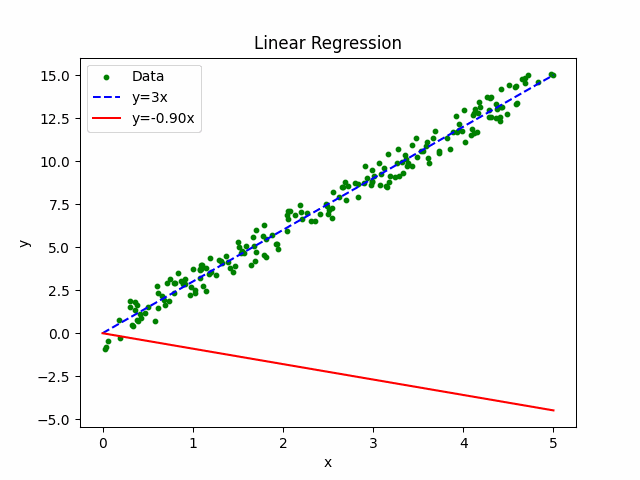

In [17]:
Image("result.gif")

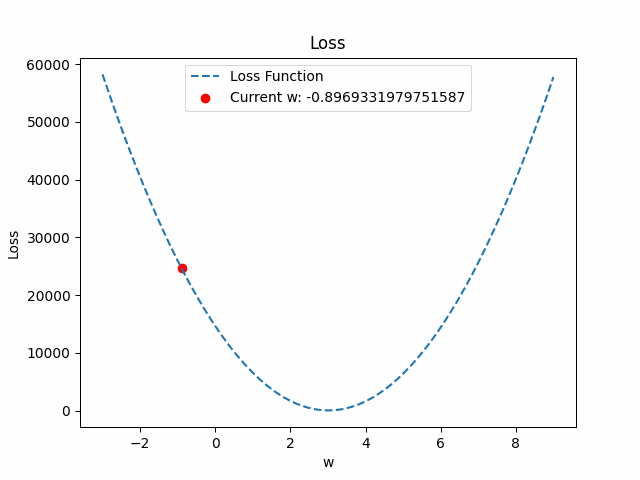

In [18]:
Image("loss.gif")